In [102]:
#CNN Architecture
'''
1.Will use Sequential model here
2.Will add '2-Conv2D layers'
    1.Inside First
        * 'filter size' 32
        * kernel size 3*3
        * activation relu
        * input shape 32,32,3
        * MaxPooling2D (2,2)
    2.Inside Second
        * 'filter size' 64
        * kernel size 5*5
        * activation relu
        * MaxPooling2D (2,2)
3.One flatten layer
4.two dense layer
'''


"\n1.Will use Sequential model here\n2.Will add '2-Conv2D layers'\n    1.Inside First\n        * 'filter size' 32\n        * kernel size 3*3\n        * activation relu\n        * input shape 32,32,3\n        * MaxPooling2D (2,2)\n    2.Inside Second\n        * 'filter size' 64\n        * kernel size 5*5\n        * activation relu\n        * MaxPooling2D (2,2)\n3.One flatten layer\n4.two dense layer\n"

In [103]:
import tensorflow
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense, Flatten,Dropout
from keras import datasets
from keras.datasets import cifar10


In [104]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

In [105]:
(X_train.shape,Y_train.shape),(X_test.shape,Y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

In [106]:
classes=['airplane','automobile','birds','cat','deer','dog','frog','horse','ship','truck']

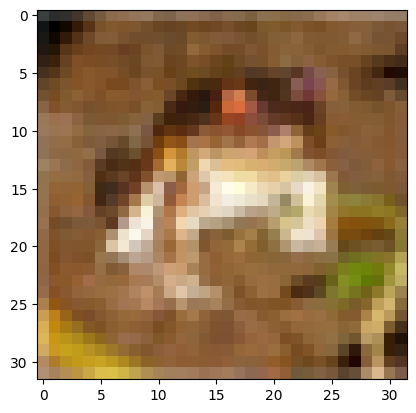

In [107]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()

In [108]:
Y_train=Y_train.reshape(-1)
Y_test=Y_test.reshape(-1)
Y_train.shape,Y_test.shape

((50000,), (10000,))

In [109]:
def prg_imgshow(X,Y,index):
  plt.title(classes[Y[index]])
  plt.imshow(X[index])
  plt.axis('off')
  plt.show()

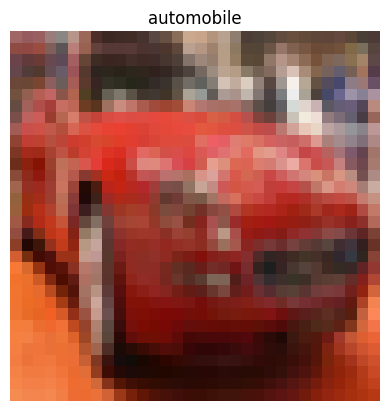

In [110]:
prg_imgshow(X_train,Y_train,5)

In [111]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [112]:
X_train.min(),X_train.max()

(0, 255)

In [113]:
#Scaling
X_train=X_train/255.0
X_test=X_test/255.0

In [114]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [115]:
X_train.min(),X_train.max()

(0.0, 1.0)

In [116]:
from keras import models
cnn_mod=models.Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64,kernel_size=(5,5),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dropout(0.3),

    Dense(200,activation='relu'),
    Dropout(0.3),
    Dense(90,activation='relu'),
    Dropout(0.3),
    Dense(10,activation='softmax')])

In [117]:
cnn_mod.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 4096)              0         
                                                                 
 dropout_13 (Dropout)        (None, 4096)             

In [118]:
from keras.optimizers import Adam
cnn_mod.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics='accuracy')

In [119]:
cnn_mod_hist=cnn_mod.fit(X_train,Y_train,epochs=15,validation_data=(X_test,Y_test))

Epoch 1/15
1563/1563 [==============================] - 171s 109ms/step - loss: 1.5748 - accuracy: 0.4256 - val_loss: 1.2199 - val_accuracy: 0.5552
Epoch 2/15
1563/1563 [==============================] - 168s 107ms/step - loss: 1.2053 - accuracy: 0.5770 - val_loss: 1.1231 - val_accuracy: 0.5988
Epoch 3/15
1563/1563 [==============================] - 169s 108ms/step - loss: 1.0623 - accuracy: 0.6306 - val_loss: 0.9336 - val_accuracy: 0.6770
Epoch 4/15
1563/1563 [==============================] - 178s 114ms/step - loss: 0.9687 - accuracy: 0.6638 - val_loss: 0.8948 - val_accuracy: 0.6883
Epoch 5/15
1563/1563 [==============================] - 183s 117ms/step - loss: 0.9004 - accuracy: 0.6912 - val_loss: 0.8855 - val_accuracy: 0.6925
Epoch 6/15
1563/1563 [==============================] - 186s 119ms/step - loss: 0.8418 - accuracy: 0.7073 - val_loss: 0.8375 - val_accuracy: 0.7090
Epoch 7/15
1563/1563 [==============================] - 182s 117ms/step - loss: 0.8106 - accuracy: 0.7210 - val_

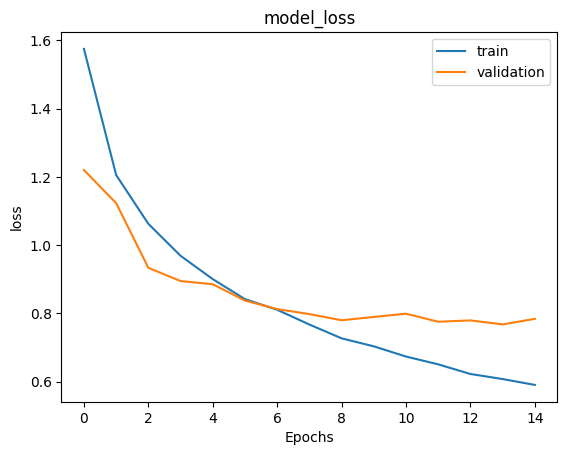

In [120]:
plt.plot(cnn_mod_hist.history['loss'])
plt.plot(cnn_mod_hist.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

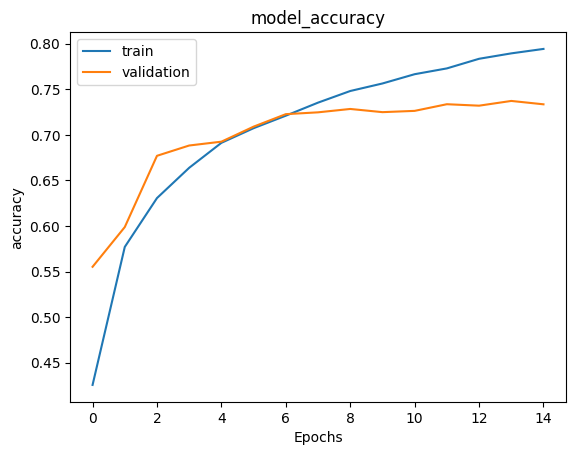

In [121]:
plt.plot(cnn_mod_hist.history['accuracy'])
plt.plot(cnn_mod_hist.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

In [122]:
cnn_mod_hist.history['accuracy']

[0.4255799949169159,
 0.5770000219345093,
 0.630620002746582,
 0.6638399958610535,
 0.6912400126457214,
 0.7073000073432922,
 0.721019983291626,
 0.7353399991989136,
 0.7480999827384949,
 0.7563599944114685,
 0.766539990901947,
 0.7728999853134155,
 0.7834600210189819,
 0.7893999814987183,
 0.7942799925804138]

In [123]:
loss,accuracy=cnn_mod.evaluate(X_test,Y_test,verbose=0)
print(loss,accuracy)


0.7840394973754883 0.7335000038146973


In [124]:
cnn_mod.save("Image_Classification.h5")